<h1> ABHRAJIT DAS
<h1> U01880578

In [154]:
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import load_digits
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.ensemble import IsolationForest
from sklearn.covariance import EllipticEnvelope

In [155]:
temp_fail = pd.read_csv("temperature_device_failure2.csv")
temp_fail

,timestamp,value
0,2013-07-04 00:00:00,69.880835
1,2013-07-04 01:00:00,71.220227
2,2013-07-04 02:00:00,70.877805
3,2013-07-04 03:00:00,68.959400
4,2013-07-04 04:00:00,69.283551
...,...,...
7262,2014-05-28 11:00:00,72.370206
7263,2014-05-28 12:00:00,72.172956
7264,2014-05-28 13:00:00,72.046565
7265,2014-05-28 14:00:00,71.825226


In [156]:
temp_fail.isnull().sum()

timestamp    0
value        0
dtype: int64

In [157]:
temp_fail.describe()

,value
count,7267.000000
mean,71.242433
std,4.247509
min,57.458406
25%,68.369411
50%,71.858493
75%,74.430958
max,86.223213



```
```

## <h1> 1) Plot / visualize the 'original' dataset

<AxesSubplot:xlabel='timestamp', ylabel='value'>

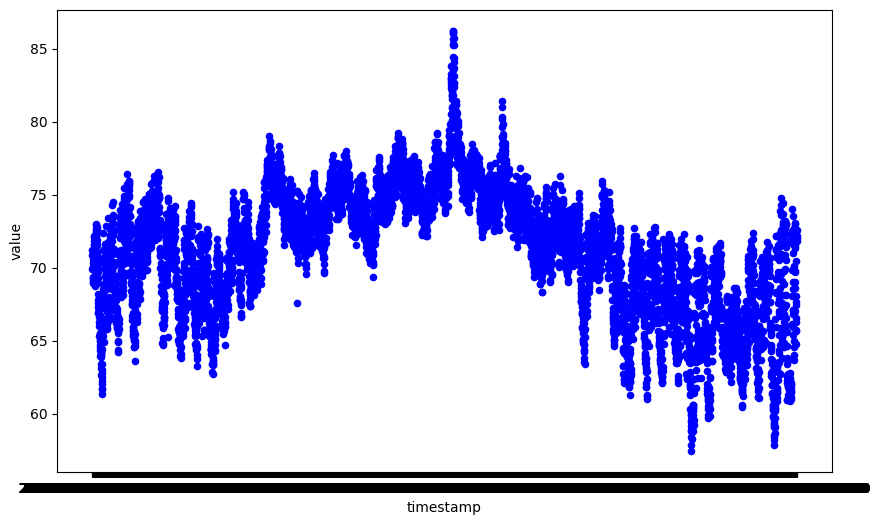

In [158]:
temp_fail.plot(kind = 'scatter', x = 'timestamp', y = 'value', figsize = (10,6), c = 'blue')

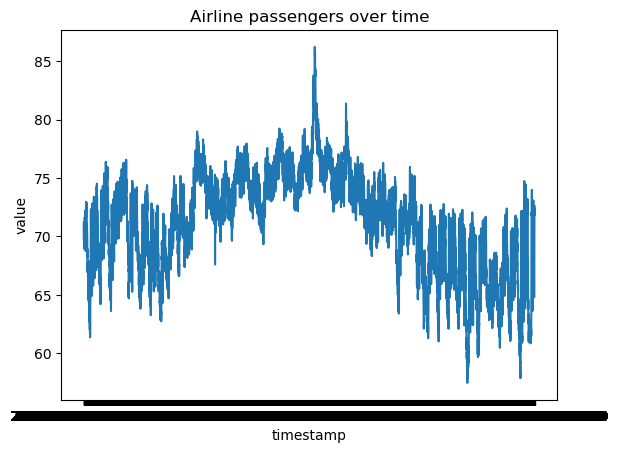

In [159]:
sns.lineplot(data=temp_fail, 
             x='timestamp', 
             y='value').set_title('Airline passengers over time');

In [160]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.dates as mdates
import seaborn as sns

 2) Feature Engineering

In [161]:
temp_fail

,timestamp,value
0,2013-07-04 00:00:00,69.880835
1,2013-07-04 01:00:00,71.220227
2,2013-07-04 02:00:00,70.877805
3,2013-07-04 03:00:00,68.959400
4,2013-07-04 04:00:00,69.283551
...,...,...
7262,2014-05-28 11:00:00,72.370206
7263,2014-05-28 12:00:00,72.172956
7264,2014-05-28 13:00:00,72.046565
7265,2014-05-28 14:00:00,71.825226


In [162]:
temp_fail1 = temp_fail.copy()
temp_fail1['timestamp'] = pd.to_datetime(temp_fail1['timestamp'], format='%Y-%m-%d %H:%M:%S')

temp_fail1['dayofweek_num'] = temp_fail1['timestamp'].dt.dayofweek
temp_fail1['dayofweek_name'] = temp_fail1['timestamp'].dt.day_name()
temp_fail1['hour'] = temp_fail1['timestamp'].dt.hour

In [163]:
temp_fail1['day'] = temp_fail1['timestamp'].dt.dayofweek
temp_fail1['day'] = ((temp_fail1['hour'] >= 6) & (temp_fail1['hour'] <= 16)).astype(int)
temp_fail1['week'] = (temp_fail1['dayofweek_num'] < 5).astype(int)
temp_fail1

,timestamp,value,dayofweek_num,dayofweek_name,hour,day,week
0,2013-07-04 00:00:00,69.880835,3,Thursday,0,0,1
1,2013-07-04 01:00:00,71.220227,3,Thursday,1,0,1
2,2013-07-04 02:00:00,70.877805,3,Thursday,2,0,1
3,2013-07-04 03:00:00,68.959400,3,Thursday,3,0,1
4,2013-07-04 04:00:00,69.283551,3,Thursday,4,0,1
...,...,...,...,...,...,...,...
7262,2014-05-28 11:00:00,72.370206,2,Wednesday,11,1,1
7263,2014-05-28 12:00:00,72.172956,2,Wednesday,12,1,1
7264,2014-05-28 13:00:00,72.046565,2,Wednesday,13,1,1
7265,2014-05-28 14:00:00,71.825226,2,Wednesday,14,1,1


In [164]:
temp_fail1['dtcat'] = temp_fail1['week']*2 + temp_fail1['day']
temp_fail1

,timestamp,value,dayofweek_num,dayofweek_name,hour,day,week,dtcat
0,2013-07-04 00:00:00,69.880835,3,Thursday,0,0,1,2
1,2013-07-04 01:00:00,71.220227,3,Thursday,1,0,1,2
2,2013-07-04 02:00:00,70.877805,3,Thursday,2,0,1,2
3,2013-07-04 03:00:00,68.959400,3,Thursday,3,0,1,2
4,2013-07-04 04:00:00,69.283551,3,Thursday,4,0,1,2
...,...,...,...,...,...,...,...,...
7262,2014-05-28 11:00:00,72.370206,2,Wednesday,11,1,1,3
7263,2014-05-28 12:00:00,72.172956,2,Wednesday,12,1,1,3
7264,2014-05-28 13:00:00,72.046565,2,Wednesday,13,1,1,3
7265,2014-05-28 14:00:00,71.825226,2,Wednesday,14,1,1,3


In [165]:
temp_fail_modified = temp_fail1.copy()
temp_fail_modified['day'] = temp_fail_modified['day'].astype('str')
temp_fail_modified.day.replace({'0' : 'Night', '1' : 'Day'}, inplace=True)
temp_fail_modified['week'] = temp_fail_modified['week'].astype('str')
temp_fail_modified.week.replace({'0' : 'Weekend', '1' : 'Weekday'}, inplace=True)
temp_fail_modified['dtcat'] = temp_fail_modified['dtcat'].astype('str')
temp_fail_modified.dtcat.replace({'0' : 'Night Weekend', '1' : 'Day Weekend', '2' : 'Night Weekday', '3' : 'Day Weekday'}, inplace=True)
temp_fail_modified[15:20]

,timestamp,value,dayofweek_num,dayofweek_name,hour,day,week,dtcat
15,2013-07-04 15:00:00,71.643291,3,Thursday,15,Day,Weekday,Day Weekday
16,2013-07-04 16:00:00,71.245659,3,Thursday,16,Day,Weekday,Day Weekday
17,2013-07-04 17:00:00,70.745100,3,Thursday,17,Night,Weekday,Night Weekday
18,2013-07-04 18:00:00,71.373298,3,Thursday,18,Night,Weekday,Night Weekday
19,2013-07-04 19:00:00,71.795751,3,Thursday,19,Night,Weekday,Night Weekday


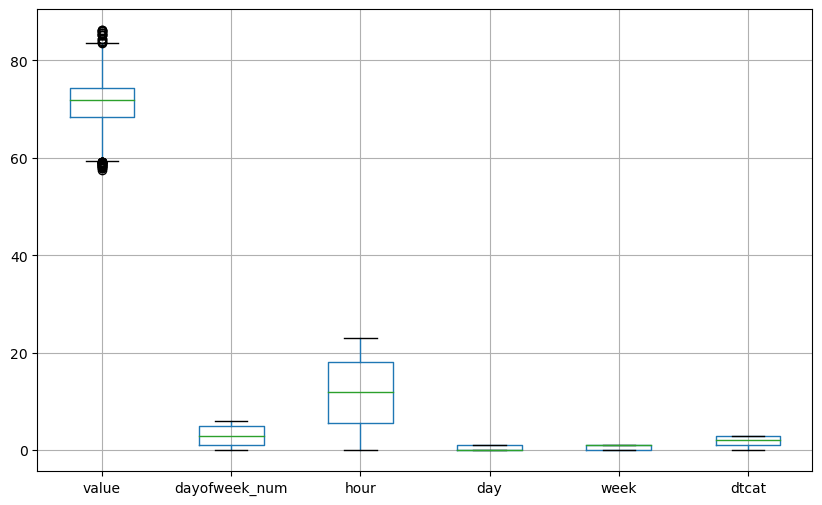

In [166]:
boxplot = temp_fail1.boxplot(column=['value', 'dayofweek_num', 'hour', 'day', 'week', 'dtcat'], figsize = (10,6))  


<AxesSubplot:>

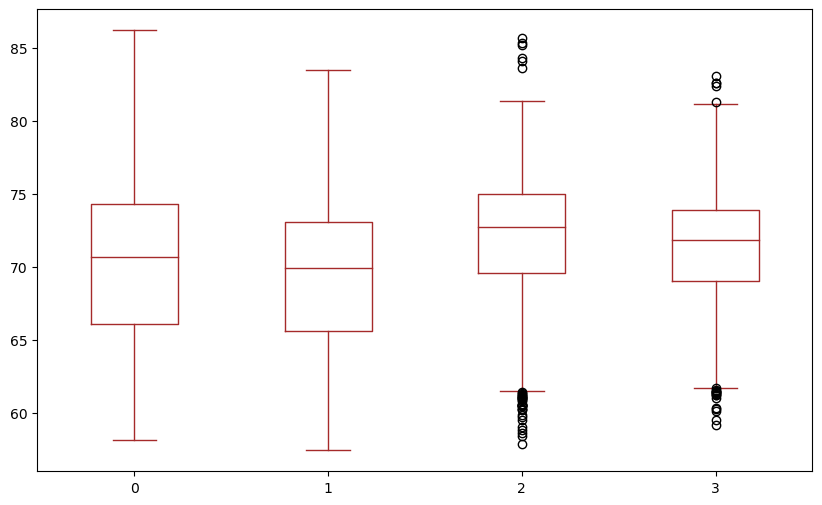

In [167]:
temp_fail1.pivot(columns = 'dtcat', values = 'value').plot(kind = 'box', figsize = (10,6), color = 'brown')

In [168]:
df=temp_fail1.drop(columns=['timestamp','dayofweek_num','dayofweek_name','hour', 'day', 'week'], axis=1).copy()

In [169]:
df.dtypes

value    float64
dtcat      int32
dtype: object

<AxesSubplot:xlabel='hour'>

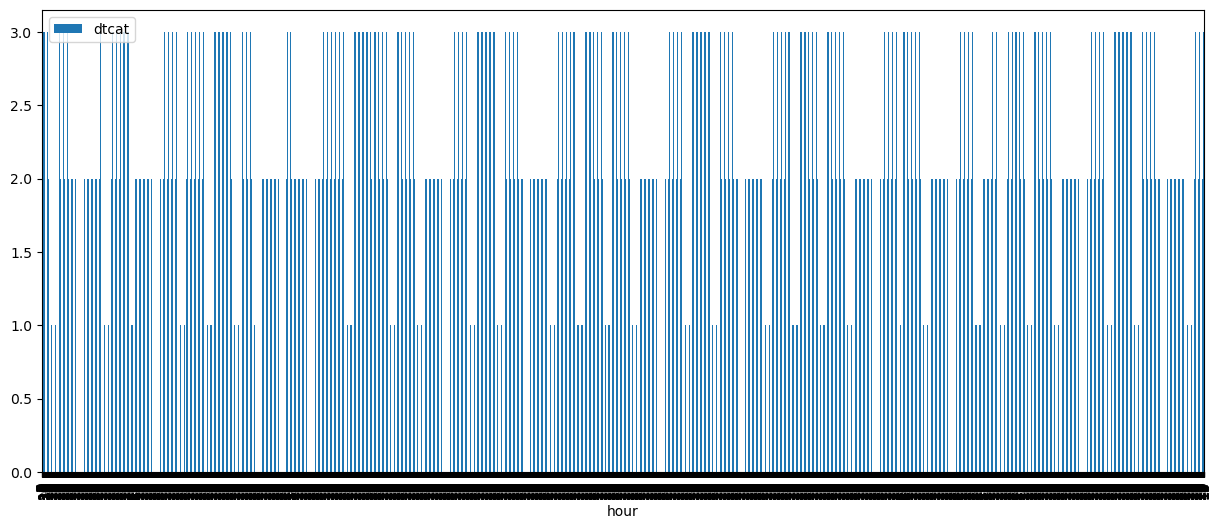

In [170]:
temp_fail1.plot(kind = 'bar', x = 'hour', y = 'dtcat', figsize =(15,6))

<h1> 3) Apply the K-Means algorithm to the revised dataset and determine the best value for
K. I would suggest to test K in the range of [1, 20]. Plot a graph showing the number of
clusters (K) in relation to score of each K-Means model. (Look at slide #20 from lecture
for setting up the plot...)


In [171]:
Kmeans_temp_fail = temp_fail1.copy()
Kmeans_temp_fail = Kmeans_temp_fail.drop(columns = 'dayofweek_name')
Kmeans_temp_fail = Kmeans_temp_fail.drop(columns = 'timestamp')
Kmeans_temp_fail

,value,dayofweek_num,hour,day,week,dtcat
0,69.880835,3,0,0,1,2
1,71.220227,3,1,0,1,2
2,70.877805,3,2,0,1,2
3,68.959400,3,3,0,1,2
4,69.283551,3,4,0,1,2
...,...,...,...,...,...,...
7262,72.370206,2,11,1,1,3
7263,72.172956,2,12,1,1,3
7264,72.046565,2,13,1,1,3
7265,71.825226,2,14,1,1,3


In [172]:
split=int(df.values.shape[0]*0.75)
train=df.values[:split,:]
test=df.values[split:,:]
wcss = []
k = range(1, 20)
for i in k: 
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 1)
    km = kmeans.fit(Kmeans_temp_fail) 
    wcss.append(km.inertia_)
    print('\n\n K-Means iteration number {}'.format(i+1))




 K-Means iteration number 2


 K-Means iteration number 3


 K-Means iteration number 4


 K-Means iteration number 5


 K-Means iteration number 6


 K-Means iteration number 7


 K-Means iteration number 8


 K-Means iteration number 9


 K-Means iteration number 10


 K-Means iteration number 11


 K-Means iteration number 12


 K-Means iteration number 13


 K-Means iteration number 14


 K-Means iteration number 15


 K-Means iteration number 16


 K-Means iteration number 17


 K-Means iteration number 18


 K-Means iteration number 19


 K-Means iteration number 20


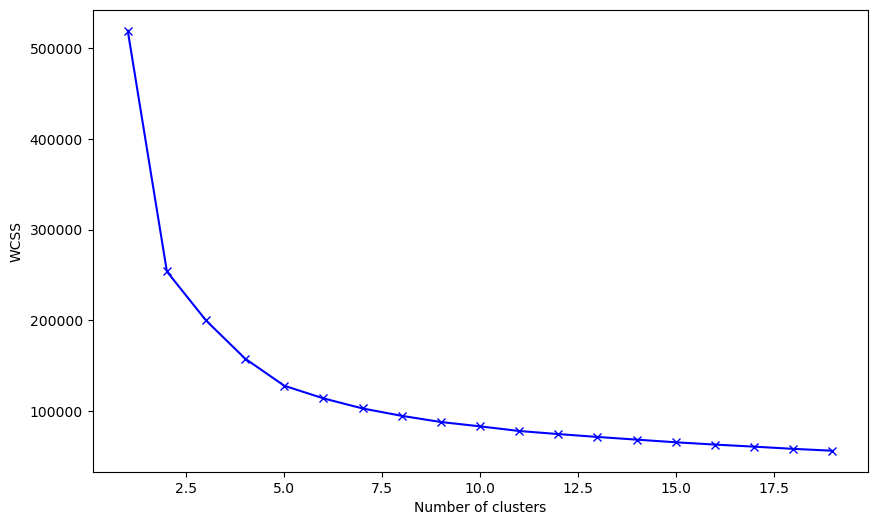

In [173]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(range(1, 20), wcss, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.show()


In [174]:
x = Kmeans_temp_fail[['dtcat', 'value']].copy()  # Make a copy of the DataFrame
kmeans = KMeans(n_clusters=5, init="k-means++", random_state=42)
y_kmeans = kmeans.fit_predict(x)
labels = kmeans.labels_
clusterCount = np.bincount(labels)
print(clusterCount)
x['cluster'] = y_kmeans

Kmeans_temp_fail['cluster'] = x['cluster']

cluster_value_counts = Kmeans_temp_fail['cluster'].value_counts()
print(cluster_value_counts)

[1815  801 2086 1355 1210]
2    2086
0    1815
3    1355
4    1210
1     801
Name: cluster, dtype: int64


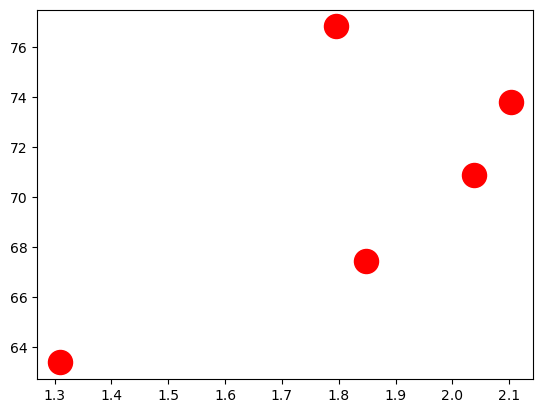

In [175]:
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(x)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

<AxesSubplot:xlabel='dtcat', ylabel='value'>

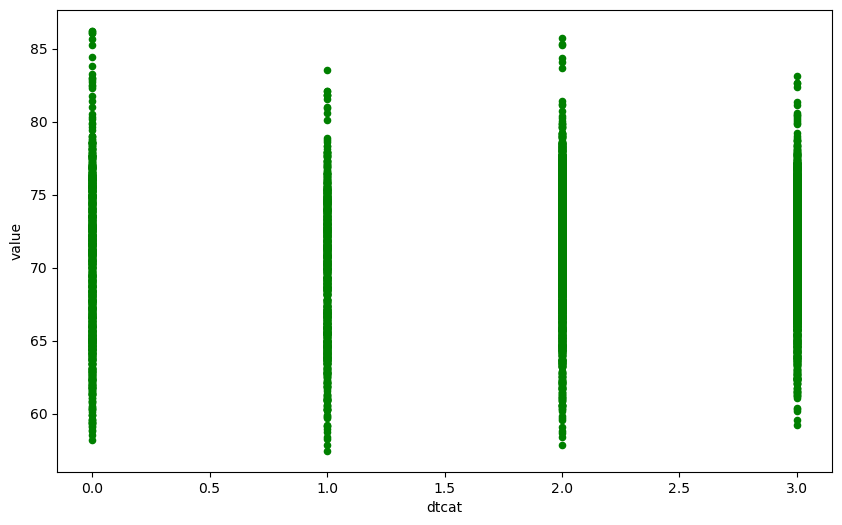

In [176]:
x.plot(kind = 'scatter', x = 'dtcat', y = 'value', figsize = (10,6), c = 'green')

<h1> 4) After determining the best value of K, plot (scatter plot) all these K clusters by
choosing 2 features from the dataset. Should the dataset has more than 2 features (which
most likely will be the case), apply PCA to derive those 2 features (2 Principal
Components) [pca = PCA(n_components=2), then 'fit' pca into the dataset]

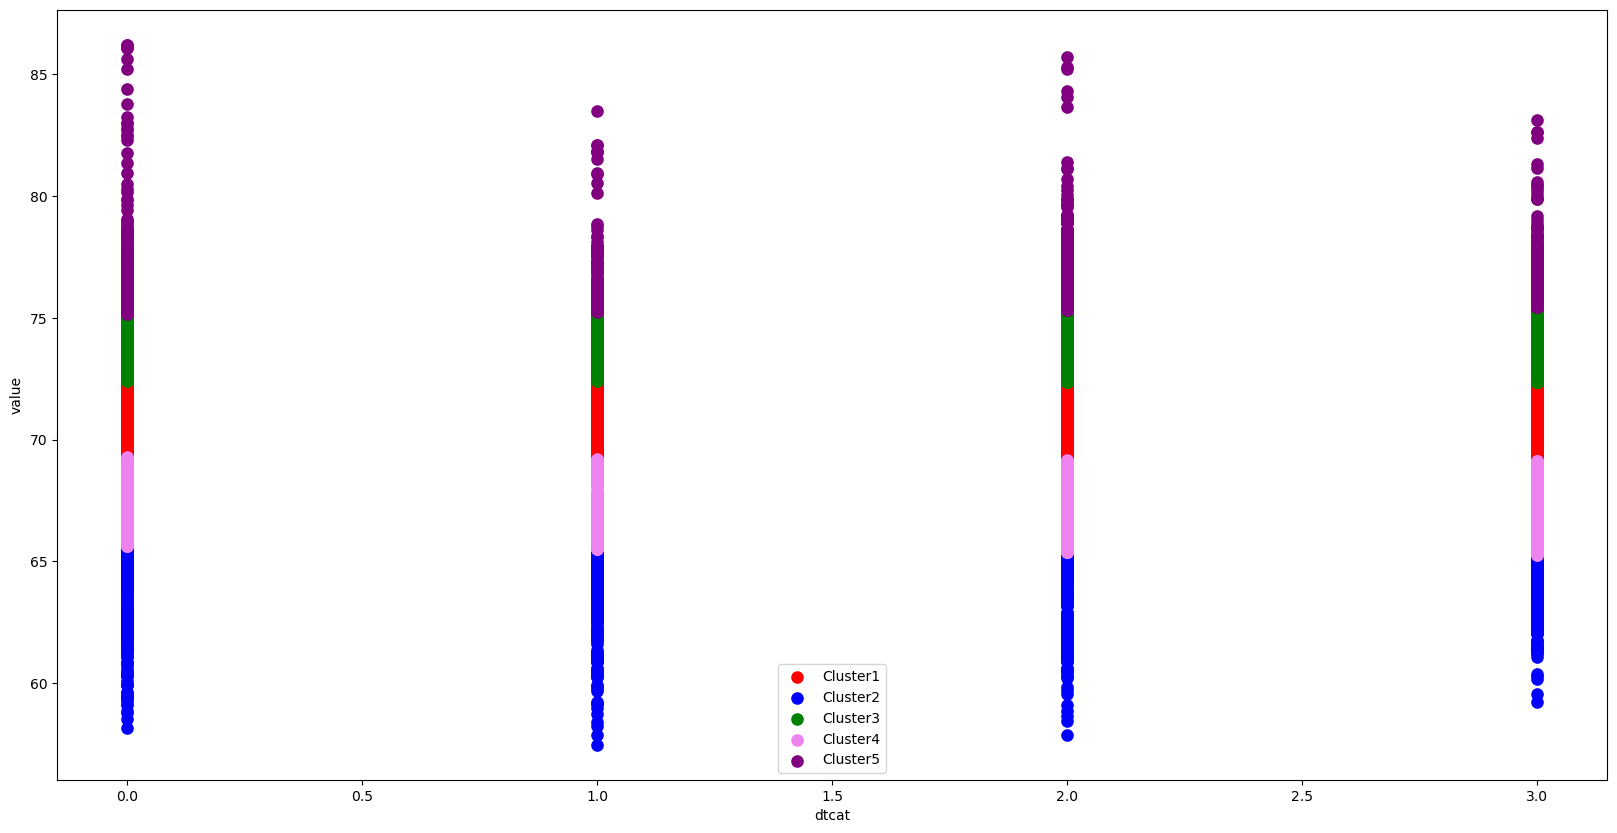

In [177]:
plt.figure(figsize=(20,10))

x=np.array(x)
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 65, c = 'red', label = 'Cluster1')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 65, c = 'blue', label = 'Cluster2')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 65, c = 'green', label = 'Cluster3')
plt.scatter(x[y_kmeans == 3, 0], x[y_kmeans == 3, 1], s = 65, c = 'violet', label = 'Cluster4')
plt.scatter(x[y_kmeans == 4, 0], x[y_kmeans == 4, 1], s = 65, c = 'purple', label = 'Cluster5')



plt.xlabel('dtcat')
plt.ylabel('value')
plt.legend()

plt.show()

In [178]:
#performing pca
pca = PCA(n_components=2)
pcadf=pca.fit_transform(train)
print(pca.explained_variance_ratio_)

[0.9153926 0.0846074]


In [179]:
PCA_tf = pd.DataFrame(data = pcadf, columns = ['pca1', 'pca2'])
PCA_tf

,pca1,pca2
0,-2.872681,-0.151018
1,-1.533580,-0.123140
2,-1.875928,-0.130267
3,-3.793917,-0.170197
4,-3.469836,-0.163450
...,...,...
5445,-1.399124,-0.120340
5446,-2.362526,-0.140397
5447,-3.315296,-0.160233
5448,-2.495105,-0.143157


In [180]:
scaler = MinMaxScaler()

In [181]:
minmax_s=preprocessing.StandardScaler()
scaled = scaler.fit_transform(PCA_tf)
scaled_data = pd.DataFrame(scaled)
ncluster=range(1,20)
kmeans = [KMeans(n_clusters=i).fit(scaled_data) for i in ncluster]
scores = [kmeans[i].score(scaled_data) for i in range(len(kmeans))]
PCA_tf['cluster'] = kmeans[3].predict(scaled_data)
PCA_tf['cluster'].value_counts()

3    2141
2    1813
1     814
0     682
Name: cluster, dtype: int64

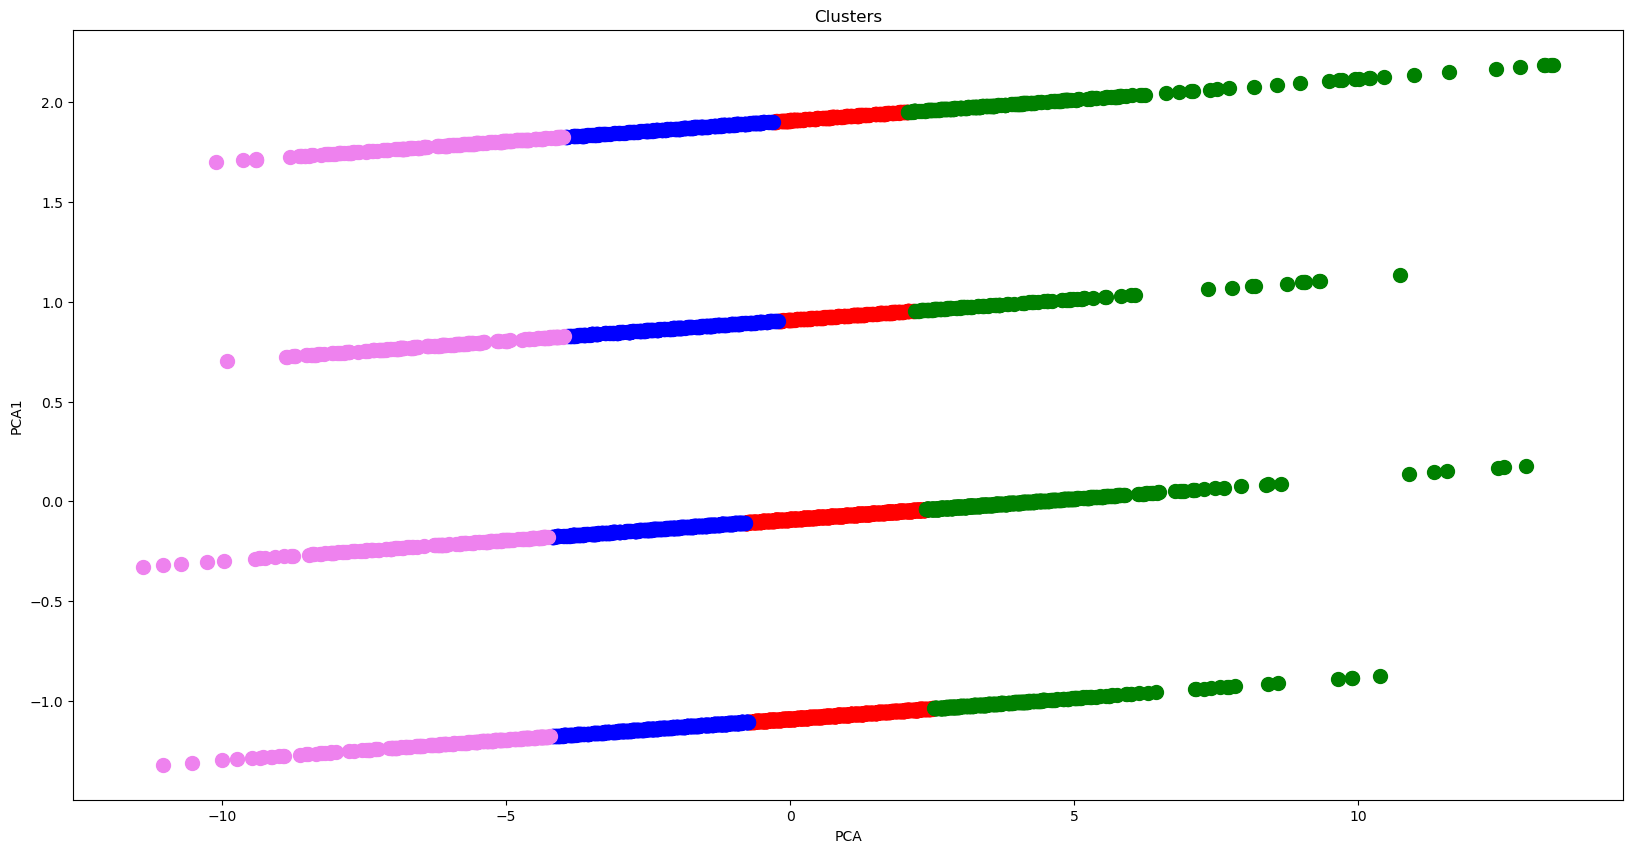

In [182]:
plt.figure(figsize=(20,10))

y_pca = PCA_tf.copy()
kmeans = KMeans(n_clusters=4, init ='k-means++', max_iter=300, n_init=10,random_state=0 )
y_kmeans = kmeans.fit_predict(y_pca)

y_pca = np.array(y_pca)
plt.scatter(y_pca[y_kmeans==0, 0], y_pca[y_kmeans==0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(y_pca[y_kmeans==1, 0], y_pca[y_kmeans==1, 1], s=100, c='blue', label ='Cluster 2')
plt.scatter(y_pca[y_kmeans==2, 0], y_pca[y_kmeans==2, 1], s=100, c='green', label ='Cluster 3')
plt.scatter(y_pca[y_kmeans==3, 0], y_pca[y_kmeans==3, 1], s=100, c='violet', label ='Cluster 4')

plt.title('Clusters')
plt.xlabel('PCA')
plt.ylabel('PCA1')
plt.show()

### Calculating IQR

In [183]:
Q1 = Kmeans_temp_fail['value'].quantile(0.25)
Q3 = Kmeans_temp_fail['value'].quantile(0.75)
print(Q1)
print(Q3)

68.36941051
74.43095786


In [184]:
IQR = Q3 - Q1
lb = Q1 - (IQR * 1.5)
ub = Q3 + (IQR * 1.5)
print(IQR)
print(lb)
print(ub)

6.061547350000012
59.277089484999976
83.52327888500002


In [185]:
out_num = Kmeans_temp_fail['value'][Kmeans_temp_fail['value'] < lb].count() + Kmeans_temp_fail['value'][Kmeans_temp_fail['value'] > ub].count()
outliers_fraction = out_num / len(Kmeans_temp_fail)
outliers_fraction

0.004816292830604101

In [186]:
out_num #Number of outliers

35

### Outlier_Fraction = 0.01

In [187]:
outliers_fraction = 0.01
out_num = outliers_fraction * len(Kmeans_temp_fail)
out_num

72.67

In [188]:
Kmeans_temp_fail

,value,dayofweek_num,hour,day,week,dtcat,cluster
0,69.880835,3,0,0,1,2,0
1,71.220227,3,1,0,1,2,0
2,70.877805,3,2,0,1,2,0
3,68.959400,3,3,0,1,2,3
4,69.283551,3,4,0,1,2,0
...,...,...,...,...,...,...,...
7262,72.370206,2,11,1,1,3,2
7263,72.172956,2,12,1,1,3,0
7264,72.046565,2,13,1,1,3,0
7265,71.825226,2,14,1,1,3,0


In [189]:
Kmeans_temp_fail[(Kmeans_temp_fail.value < lb) | (Kmeans_temp_fail.value > ub)].count()

value            35
dayofweek_num    35
hour             35
day              35
week             35
dtcat            35
cluster          35
dtype: int64

In [190]:
Kmeans_temp_fail.drop(Kmeans_temp_fail[ (Kmeans_temp_fail.value > ub) | (Kmeans_temp_fail.value < lb) ].index , inplace=True)
Kmeans_temp_fail[(Kmeans_temp_fail.value < lb) | (Kmeans_temp_fail.value > ub)].count()

value            0
dayofweek_num    0
hour             0
day              0
week             0
dtcat            0
cluster          0
dtype: int64

value               AxesSubplot(0.125,0.747241;0.352273x0.132759)
dayofweek_num    AxesSubplot(0.547727,0.747241;0.352273x0.132759)
hour                AxesSubplot(0.125,0.587931;0.352273x0.132759)
day              AxesSubplot(0.547727,0.587931;0.352273x0.132759)
week                AxesSubplot(0.125,0.428621;0.352273x0.132759)
dtcat            AxesSubplot(0.547727,0.428621;0.352273x0.132759)
cluster              AxesSubplot(0.125,0.26931;0.352273x0.132759)
dtype: object

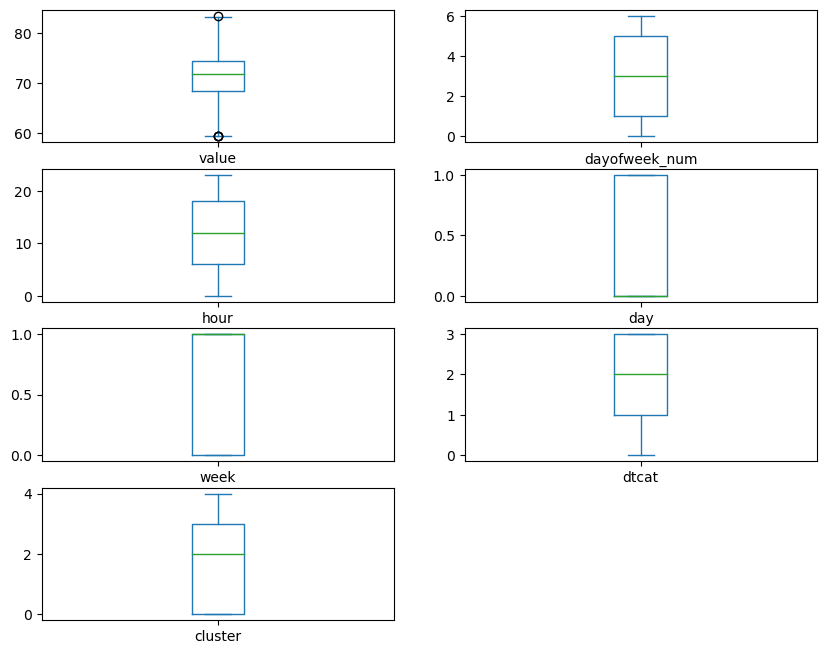

In [191]:
Kmeans_temp_fail.plot(kind="box", subplots=True, layout=(5, 2), figsize=(10, 10))

value       AxesSubplot(0.125,0.653529;0.227941x0.226471)
dtcat    AxesSubplot(0.398529,0.653529;0.227941x0.226471)
dtype: object

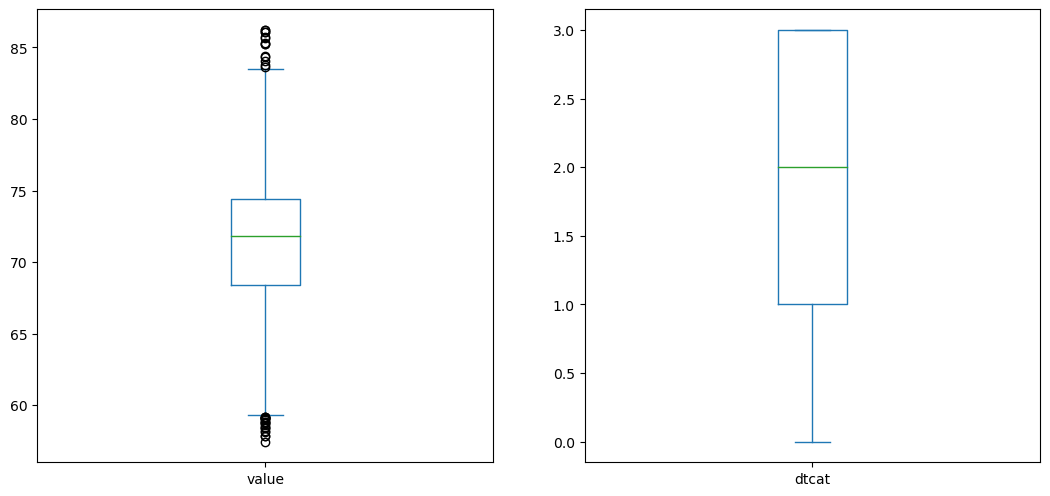

In [192]:
df.plot(kind = "box", subplots=True, figsize = (20,20), layout= (3,3))

5) Gaussian distribution (EllipticEnvelope)

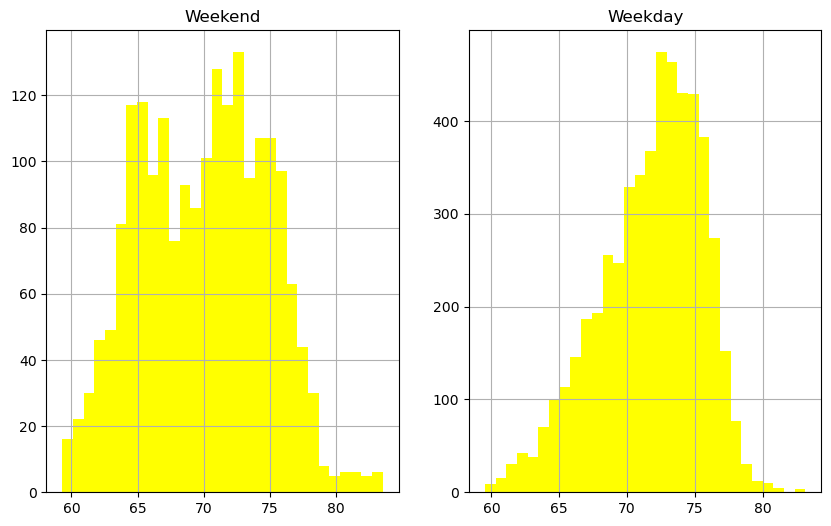

In [193]:
temp_fail_class0 = Kmeans_temp_fail.loc[Kmeans_temp_fail['week'] == 0, 'value']
temp_fail_class1 = Kmeans_temp_fail.loc[Kmeans_temp_fail['week'] == 1, 'value']

fig, axs = plt.subplots(1,2, figsize=(10, 6))
temp_fail_class0.hist(ax=axs[0], bins=30, color='yellow')
temp_fail_class1.hist(ax=axs[1], bins=30, color='yellow');
axs[0].set_title("Weekend")
axs[1].set_title("Weekday");

In [194]:
envelope =  EllipticEnvelope(contamination = outliers_fraction) 
X_train = temp_fail_class0.values.reshape(-1,1)
envelope.fit(X_train)
temp_fail_class0 = pd.DataFrame(temp_fail_class0)
temp_fail_class0['score'] = envelope.decision_function(X_train)
temp_fail_class0['anomaly'] = envelope.predict(X_train)

envelope =  EllipticEnvelope(contamination = outliers_fraction) 
X_train = temp_fail_class1.values.reshape(-1,1)
envelope.fit(X_train)
temp_fail_class1 = pd.DataFrame(temp_fail_class1)
temp_fail_class1['score'] = envelope.decision_function(X_train)
temp_fail_class1['anomaly'] = envelope.predict(X_train)

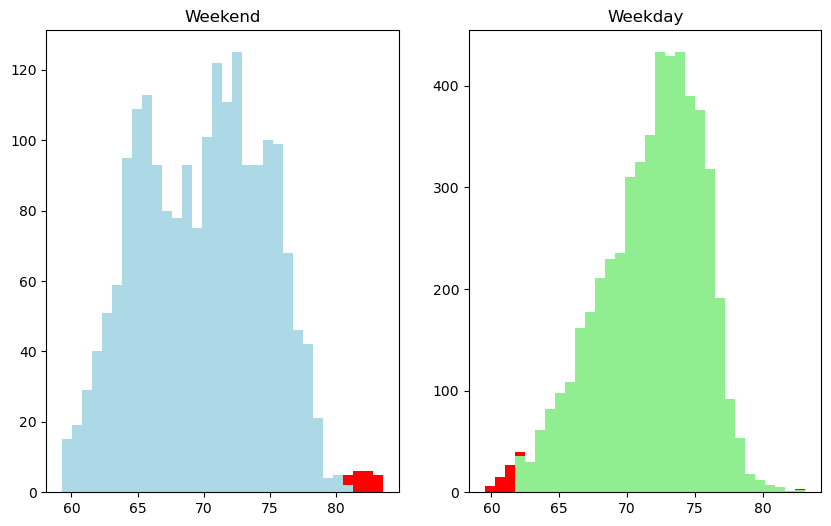

In [195]:
# plot the value by categories with anomalies
a0 = temp_fail_class0.loc[temp_fail_class0['anomaly'] == 1, 'value']
b0 = temp_fail_class0.loc[temp_fail_class0['anomaly'] == -1, 'value']

a2 = temp_fail_class1.loc[temp_fail_class1['anomaly'] == 1, 'value']
b2 = temp_fail_class1.loc[temp_fail_class1['anomaly'] == -1, 'value']

fig, axs = plt.subplots(1,2, figsize=(10, 6))
axs[0].hist([a0,b0], bins=32, stacked=True, color=['lightblue', 'red'])
axs[1].hist([a2,b2], bins=32, stacked=True, color=['lightgreen', 'red'])
axs[0].set_title("Weekend")
axs[1].set_title("Weekday");
plt.show();

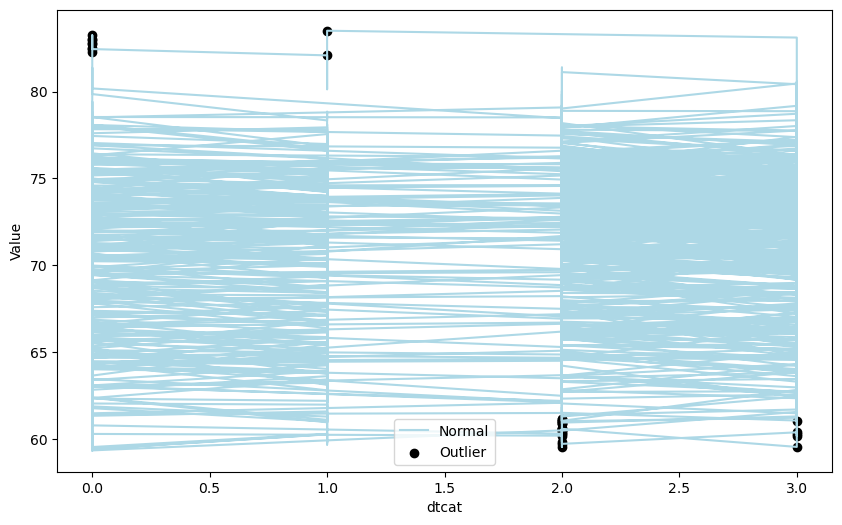

In [228]:
temp_fail_class = pd.concat([temp_fail_class0, temp_fail_class1])
Kmeans_temp_fail['anomaly5'] = temp_fail_class['anomaly']

fig, ax = plt.subplots(figsize=(10, 6))
a = Kmeans_temp_fail.loc[Kmeans_temp_fail['anomaly5'] == -1, ('dtcat', 'value')]
ax.plot(Kmeans_temp_fail['dtcat'], Kmeans_temp_fail['value'], color='lightblue', label='Normal')
ax.scatter(a['dtcat'],a['value'], color='black', label='Outlier')

plt.xlabel('dtcat')
plt.ylabel('Value')
plt.legend()
plt.show();

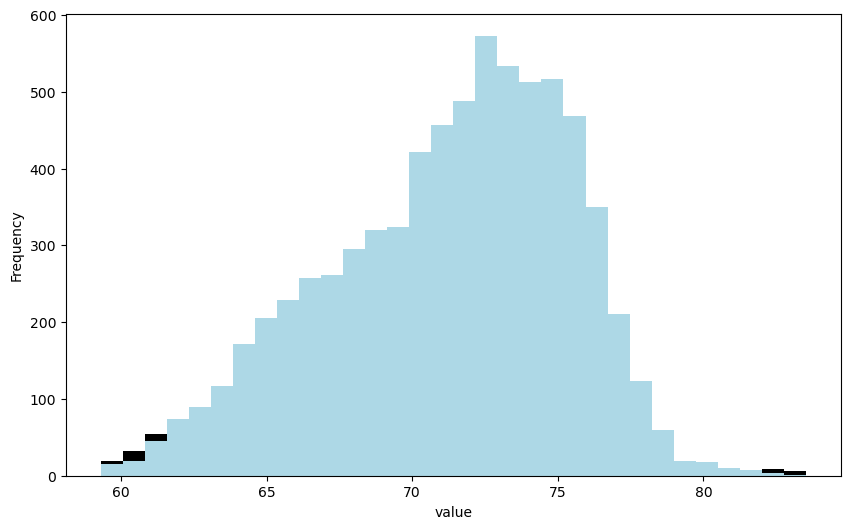

In [229]:
a = Kmeans_temp_fail.loc[Kmeans_temp_fail['anomaly5'] == 1, 'value']
b = Kmeans_temp_fail.loc[Kmeans_temp_fail['anomaly5'] == -1, 'value']

fig, axs = plt.subplots(figsize=(10, 6))
axs.hist([a,b], bins=32, stacked=True, color=['lightblue', 'black'])
plt.xlabel('value')
plt.ylabel('Frequency')
plt.show();

In [198]:
Kmeans_temp_fail['anomaly5'] = envelope.fit(temp_fail_class[['value']]).predict(temp_fail_class[['value']])

In [199]:
Kmeans_temp_fail.describe()

,value,dayofweek_num,hour,day,week,dtcat,cluster,anomaly5
count,7232.000000,7232.000000,7232.000000,7232.000000,7232.000000,7232.000000,7232.000000,7232.000000
mean,71.252086,2.983960,11.516178,0.458379,0.723313,1.905006,1.908324,0.979812
std,4.158366,1.973694,6.920855,0.498299,0.447391,1.024775,1.397304,0.199935
min,59.316661,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000
25%,68.404350,1.000000,6.000000,0.000000,0.000000,1.000000,0.000000,1.000000
50%,71.860208,3.000000,12.000000,0.000000,1.000000,2.000000,2.000000,1.000000
75%,74.422168,5.000000,18.000000,1.000000,1.000000,3.000000,3.000000,1.000000
max,83.511630,6.000000,23.000000,1.000000,1.000000,3.000000,4.000000,1.000000


In [200]:
outliers_c = len(Kmeans_temp_fail[Kmeans_temp_fail['value'] > 74.422168])
outliers_c

1808

In [201]:
print("Accuracy of the EE:", 100*list(Kmeans_temp_fail['anomaly5']).count(-1)/(outliers_c))

Accuracy of the EE: 4.037610619469026


<h1> 6) Isolation Forest

In [203]:
data = Kmeans_temp_fail[['value']]
scaler = StandardScaler()
np_scaled = scaler.fit_transform(data)
data = pd.DataFrame(np_scaled)

In [204]:
model =  IsolationForest(contamination=outliers_fraction)
model.fit(data)

IsolationForest(contamination=0.01)

In [205]:
import warnings

warnings.filterwarnings("ignore", category=UserWarning)

Kmeans_temp_fail['scores'] = model.decision_function(Kmeans_temp_fail[['value']])
Kmeans_temp_fail['anomaly2'] = pd.Series(model.predict(data))

In [206]:
anomaly=Kmeans_temp_fail.loc[Kmeans_temp_fail['anomaly2']==-1]
anomaly_index=list(anomaly.index)
print(anomaly)

          value  dayofweek_num  hour  day  week  dtcat  cluster  anomaly5  \
3694  79.861064              5    17    0     0      0        4         1   
3695  80.520263              5    18    0     0      0        4         1   
3696  79.896875              5    19    0     0      0        4         1   
3697  82.289240              5    20    0     0      0        4         1   
3698  82.989869              5    21    0     0      0        4         1   
...         ...            ...   ...  ...   ...    ...      ...       ...   
7001  64.525634              5    14    1     0      1        1         1   
7002  64.674002              5    15    1     0      1        1         1   
7003  62.794053              5    16    1     0      1        1         1   
7005  62.559820              5    18    0     0      0        1         1   
7007  62.730632              5    20    0     0      0        1         1   

        scores  anomaly2  
3694 -0.064286      -1.0  
3695 -0.064286      -

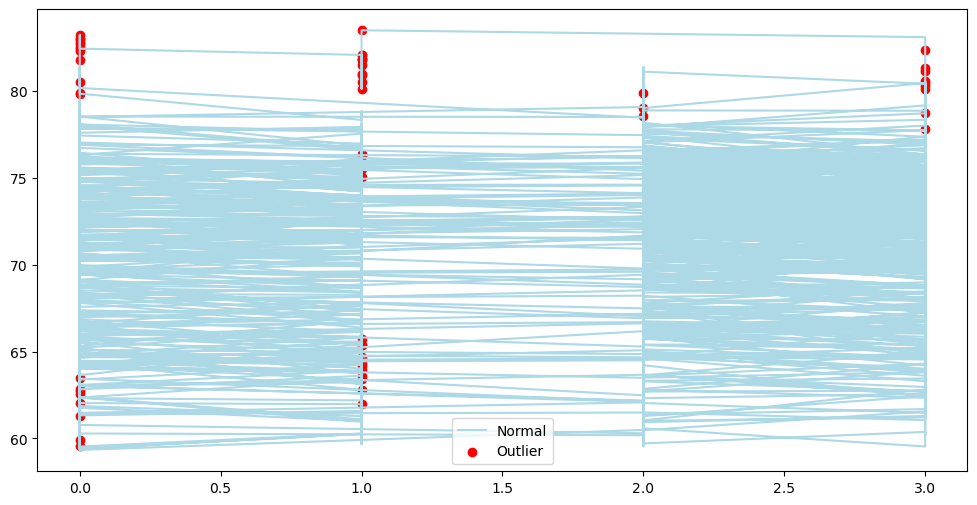

In [207]:
data = Kmeans_temp_fail[['value']]
scaler = StandardScaler()
np_scaled = scaler.fit_transform(data)
data = pd.DataFrame(np_scaled)

fig, ax = plt.subplots(figsize=(12,6))

a = Kmeans_temp_fail.loc[Kmeans_temp_fail['anomaly2'] == -1, ['dtcat', 'value']]

ax.plot(Kmeans_temp_fail['dtcat'], Kmeans_temp_fail['value'], color='lightblue', label = 'Normal')
ax.scatter(a['dtcat'],a['value'], color='red', label = 'Outlier')
plt.legend()

plt.show()

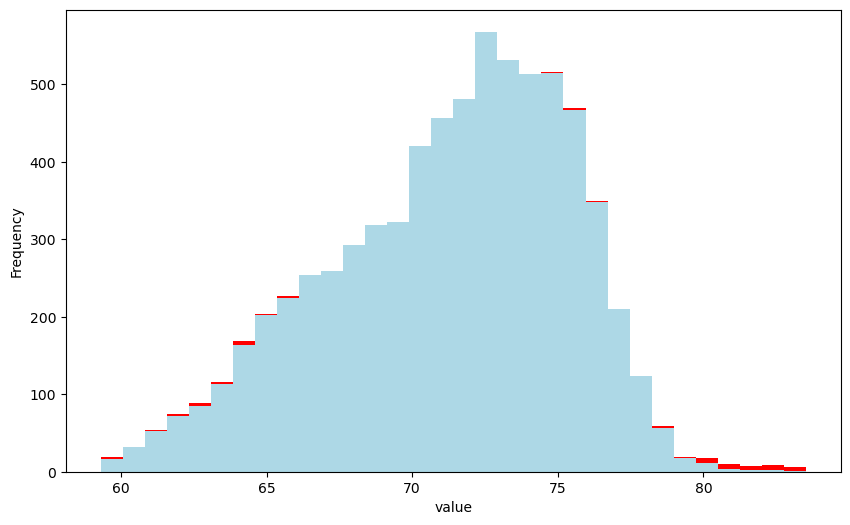

In [208]:
a = Kmeans_temp_fail.loc[Kmeans_temp_fail['anomaly2'] == 1, 'value']
b = Kmeans_temp_fail.loc[Kmeans_temp_fail['anomaly2'] == -1, 'value']

fig, axs = plt.subplots(figsize=(10,6))
axs.hist([a,b], bins=32, stacked=True, color=['lightblue', 'red'])
plt.xlabel('value')
plt.ylabel('Frequency')
plt.show()

In [209]:
Kmeans_temp_fail.describe()

,value,dayofweek_num,hour,day,week,dtcat,cluster,anomaly5,scores,anomaly2
count,7232.000000,7232.000000,7232.000000,7232.000000,7232.000000,7232.000000,7232.000000,7232.000000,7.232000e+03,7197.000000
mean,71.252086,2.983960,11.516178,0.458379,0.723313,1.905006,1.908324,0.979812,-6.428648e-02,0.983048
std,4.158366,1.973694,6.920855,0.498299,0.447391,1.024775,1.397304,0.199935,6.300951e-15,0.183358
min,59.316661,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-6.428648e-02,-1.000000
25%,68.404350,1.000000,6.000000,0.000000,0.000000,1.000000,0.000000,1.000000,-6.428648e-02,1.000000
50%,71.860208,3.000000,12.000000,0.000000,1.000000,2.000000,2.000000,1.000000,-6.428648e-02,1.000000
75%,74.422168,5.000000,18.000000,1.000000,1.000000,3.000000,3.000000,1.000000,-6.428648e-02,1.000000
max,83.511630,6.000000,23.000000,1.000000,1.000000,3.000000,4.000000,1.000000,-6.428648e-02,1.000000


In [210]:
outliers_counter = len(Kmeans_temp_fail[Kmeans_temp_fail['value'] > 74.422168])
outliers_counter

1808

In [211]:
print("Accuracy percentage of Isolation Forest:", 100*list(Kmeans_temp_fail['anomaly2']).count(-1)/(outliers_counter))

Accuracy percentage of Isolation Forest: 3.3738938053097347


<h1> Elliptic Envelope is Better as we have compared our accuracy for both of this.

<h2> Outlier_Fraction = 0.004816292830604101

In [212]:
outliers_fraction1 = 0.004816292830604101
tf3 = Kmeans_temp_fail.copy()
tf3 = tf3.drop(columns = 'anomaly5')
tf3 = tf3.drop(columns = 'scores')
tf3 = tf3.drop(columns = 'anomaly2')
tf3

,value,dayofweek_num,hour,day,week,dtcat,cluster
0,69.880835,3,0,0,1,2,0
1,71.220227,3,1,0,1,2,0
2,70.877805,3,2,0,1,2,0
3,68.959400,3,3,0,1,2,3
4,69.283551,3,4,0,1,2,0
...,...,...,...,...,...,...,...
7262,72.370206,2,11,1,1,3,2
7263,72.172956,2,12,1,1,3,0
7264,72.046565,2,13,1,1,3,0
7265,71.825226,2,14,1,1,3,0


<h2> Gaussian distribution (EllipticEnvelope)

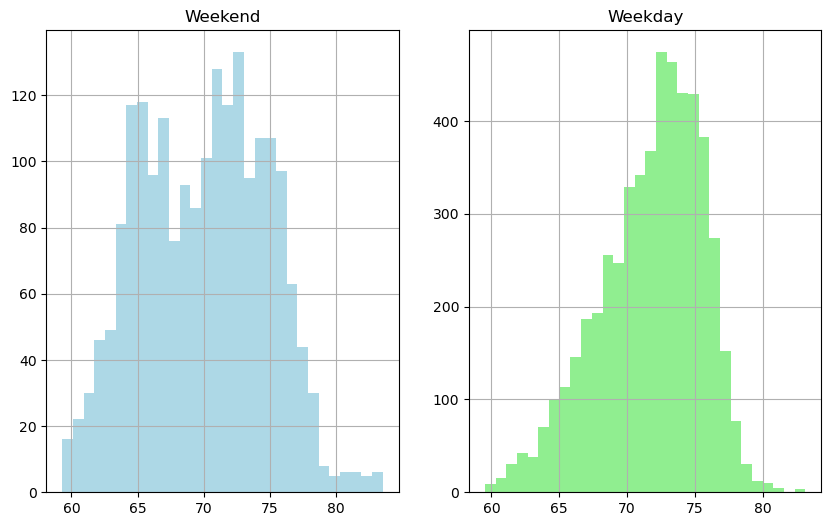

In [213]:
temp_fail_class0 = tf3.loc[tf3['week'] == 0, 'value']
temp_fail_class1 = tf3.loc[tf3['week'] == 1, 'value']

fig, axs = plt.subplots(1,2, figsize=(10, 6))
temp_fail_class0.hist(ax=axs[0], bins=30, color='lightblue')
temp_fail_class1.hist(ax=axs[1], bins=30, color='lightgreen');
axs[0].set_title("Weekend")
axs[1].set_title("Weekday");

In [214]:
envelope =  EllipticEnvelope(contamination = outliers_fraction1) 
X_train = temp_fail_class0.values.reshape(-1,1)
envelope.fit(X_train)
temp_fail_class0 = pd.DataFrame(temp_fail_class0)
temp_fail_class0['score'] = envelope.decision_function(X_train)
temp_fail_class0['anomaly'] = envelope.predict(X_train)

envelope =  EllipticEnvelope(contamination = outliers_fraction1) 
X_train = temp_fail_class1.values.reshape(-1,1)
envelope.fit(X_train)
temp_fail_class1 = pd.DataFrame(temp_fail_class1)
temp_fail_class1['score'] = envelope.decision_function(X_train)
temp_fail_class1['anomaly'] = envelope.predict(X_train)

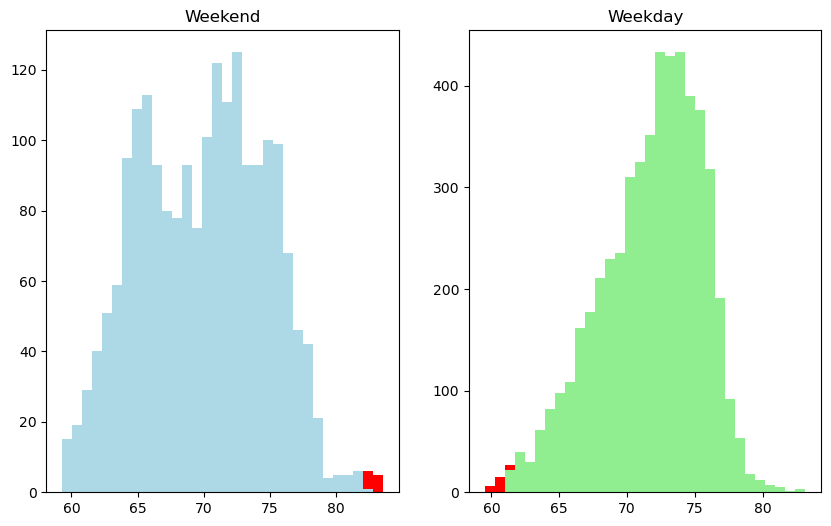

In [215]:
# plot the price repartition by categories with anomalies
a0 = temp_fail_class0.loc[temp_fail_class0['anomaly'] == 1, 'value']
b0 = temp_fail_class0.loc[temp_fail_class0['anomaly'] == -1, 'value']

a2 = temp_fail_class1.loc[temp_fail_class1['anomaly'] == 1, 'value']
b2 = temp_fail_class1.loc[temp_fail_class1['anomaly'] == -1, 'value']

fig, axs = plt.subplots(1,2, figsize=(10, 6))
axs[0].hist([a0,b0], bins=32, stacked=True, color=['lightblue', 'red'])
axs[1].hist([a2,b2], bins=32, stacked=True, color=['lightgreen', 'red'])
axs[0].set_title("Weekend")
axs[1].set_title("Weekday");
plt.show();

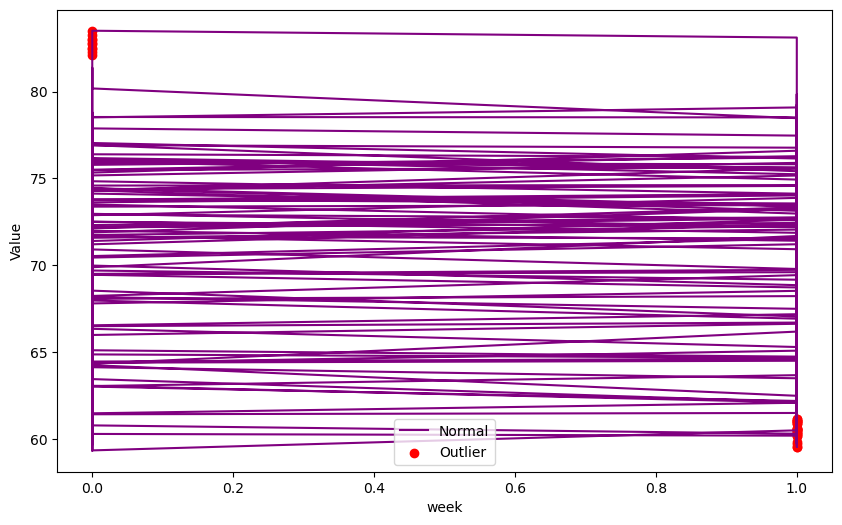

In [230]:
tf_class = pd.concat([temp_fail_class0, temp_fail_class1])
tf3['anomaly'] = tf_class['anomaly']

fig, ax = plt.subplots(figsize=(10, 6))
a = tf3.loc[tf3['anomaly'] == -1, ('week', 'value')]
ax.plot(tf3['week'], tf3['value'], color='purple', label='Normal')
ax.scatter(a['week'],a['value'], color='red', label='Outlier')

plt.xlabel('week')
plt.ylabel('Value')
plt.legend()
plt.show();

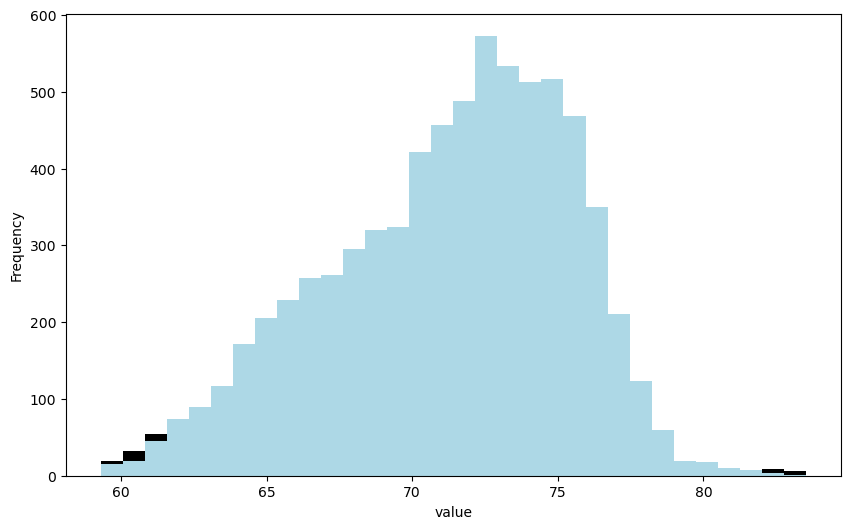

In [234]:
a = tf3.loc[tf3['anomaly'] == 1, 'value']
b = tf3.loc[tf3['anomaly'] == -1, 'value']

fig, axs = plt.subplots(figsize=(10, 6))
axs.hist([a,b], bins=32, stacked=True, color=['lightblue', 'black'])
plt.xlabel('value')
plt.ylabel('Frequency')
plt.show();

In [218]:
tf3.describe()

,value,dayofweek_num,hour,day,week,dtcat,cluster,anomaly
count,7232.000000,7232.000000,7232.000000,7232.000000,7232.000000,7232.000000,7232.000000,7232.000000
mean,71.252086,2.983960,11.516178,0.458379,0.723313,1.905006,1.908324,0.990044
std,4.158366,1.973694,6.920855,0.498299,0.447391,1.024775,1.397304,0.140766
min,59.316661,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000
25%,68.404350,1.000000,6.000000,0.000000,0.000000,1.000000,0.000000,1.000000
50%,71.860208,3.000000,12.000000,0.000000,1.000000,2.000000,2.000000,1.000000
75%,74.422168,5.000000,18.000000,1.000000,1.000000,3.000000,3.000000,1.000000
max,83.511630,6.000000,23.000000,1.000000,1.000000,3.000000,4.000000,1.000000


In [219]:
print("Accuracy of the EE:", 100*list(tf3['anomaly']).count(-1)/(outliers_c))

Accuracy of the EE: 1.991150442477876


<h2> 6) Isolation Forest

In [220]:
data = tf3[['value']]
scaler = StandardScaler()
np_scaled = scaler.fit_transform(data)
data = pd.DataFrame(np_scaled)

In [221]:
model =  IsolationForest(contamination=outliers_fraction1)
model.fit(data)

IsolationForest(contamination=0.004816292830604101)

In [222]:
tf3['scores']=model.decision_function(tf3[['value']])
tf3['anomaly2'] = pd.Series(model.predict(data))

In [223]:
anomaly=tf3.loc[tf3['anomaly2']==-1]
anomaly_index=list(anomaly.index)
print(anomaly)

          value  dayofweek_num  hour  day  week  dtcat  cluster  anomaly  \
3697  82.289240              5    20    0     0      0        4       -1   
3698  82.989869              5    21    0     0      0        4       -1   
3699  83.247886              5    22    0     0      0        4       -1   
3700  82.519659              5    23    0     0      0        4       -1   
3701  82.736802              6     0    0     0      0        4       -1   
3703  83.008634              6     2    0     0      0        4       -1   
3704  82.815627              6     3    0     0      0        4       -1   
3705  81.774744              6     4    0     0      0        4        1   
3706  82.454278              6     5    0     0      0        4       -1   
3707  82.091901              6     6    1     0      1        4        1   
3708  80.969986              6     7    1     0      1        4        1   
3709  81.848025              6     8    1     0      1        4        1   
3710  82.110

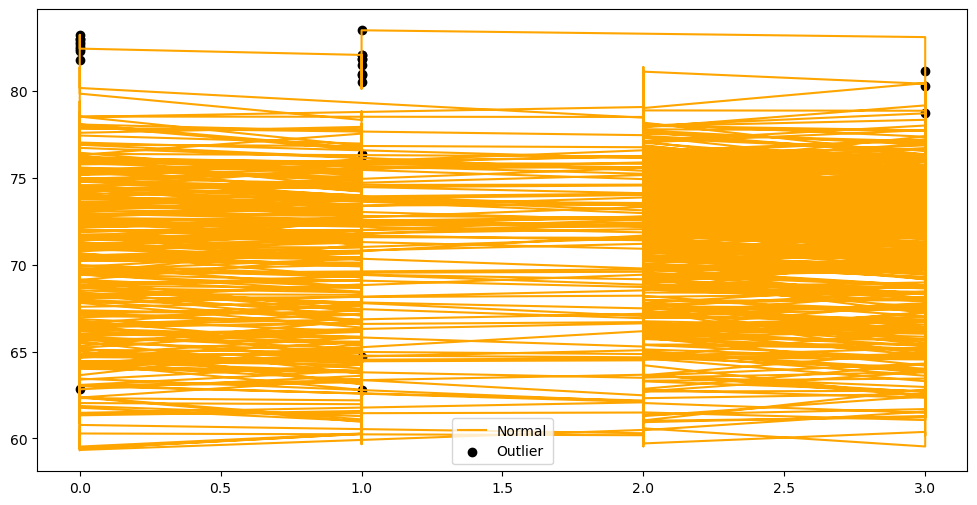

In [224]:
data = tf3[['value']]
scaler = StandardScaler()
np_scaled = scaler.fit_transform(data)
data = pd.DataFrame(np_scaled)

fig, ax = plt.subplots(figsize=(12,6))

a = tf3.loc[tf3['anomaly2'] == -1, ['dtcat', 'value']]

ax.plot(tf3['dtcat'], tf3['value'], color='orange', label = 'Normal')
ax.scatter(a['dtcat'],a['value'], color='black', label = 'Outlier')
plt.legend()

plt.show()

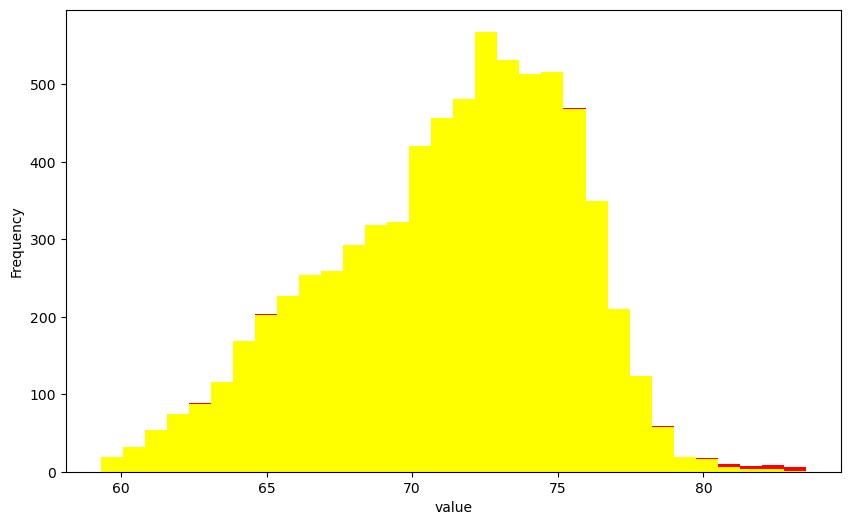

In [225]:
a = tf3.loc[tf3['anomaly2'] == 1, 'value']
b = tf3.loc[tf3['anomaly2'] == -1, 'value']

fig, axs = plt.subplots(figsize=(10,6))
axs.hist([a,b], bins=32, stacked=True, color=['yellow', 'red'])
plt.xlabel('value')
plt.ylabel('Frequency')
plt.show()

In [226]:
outliers_counter = len(tf3[tf3['value'] > 74.422168])
outliers_counter

1808

In [227]:
print("Accuracy percentage of Isolation Forest:", 100*list(tf3['anomaly2']).count(-1)/(outliers_counter))

Accuracy percentage of Isolation Forest: 1.4380530973451326


<h1> Elliptic Envelope is Better

<h1> THANK YOU!!